In [17]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [19]:
df = pd.read_csv("../Python/Output/AdjMatrix_4_9.txt", sep='\t')
df.head()

,NoiseType,Noise,Size,Repeat,Adjugate Error Deviation,Adjugate Error Mean,Adjugate Error Minimum,Adjugate Error Maximum,Adjugate Error Count,Adjugate Error Loss,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,Gaussian,0.000000e+00,4,47,0.000000,0.000000,0.000000,0.000000,762,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,Gaussian,1.000000e-17,4,47,0.025420,0.001490,-0.265965,0.528788,762,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Gaussian,1.000000e-16,4,47,0.709111,-0.037516,-2.099721,2.249164,728,0,...,0.031593,0.012363,0.009615,0.004121,0.004121,0.001374,0.000000,0.000000,0.000000,0.0
3,Gaussian,1.000000e-15,4,47,0.898365,-0.006803,-2.821130,2.706281,734,0,...,0.036785,0.017711,0.017711,0.010899,0.014986,0.002725,0.001362,0.004087,0.001362,0.0
4,Gaussian,1.000000e-14,4,47,1.016519,-0.008872,-2.884012,3.312820,725,2,...,0.031812,0.023513,0.023513,0.023513,0.008299,0.011065,0.005533,0.001383,0.000000,0.0


In [20]:
df.columns

Index(['NoiseType', 'Noise', 'Size', 'Repeat', 'Adjugate Error Deviation',
       'Adjugate Error Mean', 'Adjugate Error Minimum',
       'Adjugate Error Maximum', 'Adjugate Error Count', 'Adjugate Error Loss',
       'Adjugate Uncertainty Deviation', 'Adjugate Uncertainty Mean',
       'Adjugate Uncertainty Minimum', 'Adjugate Uncertainty Maximum',
       'Adjugate Uncertainty Count', 'Adjugate Uncertainty Loss',
       'Forward Error Deviation', 'Forward Error Mean',
       'Forward Error Minimum', 'Forward Error Maximum', 'Forward Error Count',
       'Forward Error Loss', 'Roundtrip Error Deviation',
       'Roundtrip Error Mean', 'Roundtrip Error Minimum',
       'Roundtrip Error Maximum', 'Roundtrip Error Count',
       'Roundtrip Error Loss', 'Multiple Error Deviation',
       'Multiple Error Mean', 'Multiple Error Minimum',
       'Multiple Error Maximum', 'Multiple Error Count', 'Multiple Error Loss',
       '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8', '-1.6', '-1.4

In [21]:
df['Noise'].unique()

array([0.e+00, 1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11,
       1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])

In [41]:
df[df['Noise'] == 0][['Size', 'Adjugate Error Mean', 'Forward Error Mean', 'Roundtrip Error Mean']].head()

,Size,Adjugate Error Mean,Forward Error Mean,Roundtrip Error Mean
0,4,0.000000,0.000000,9.996142e+12
18,5,0.000000,0.000000,4.639745e+12
36,6,0.000000,0.000000,-1.887499e+12
54,7,0.000000,0.015162,-2.181667e+12
72,8,0.018129,0.251495,-3.497207e+12


# Overall

In [22]:
def PlotSurface(value, title='', zlabel='', logz=False, zlim=[], cmap=None, view=(30, 45)):
    dfOrderVsNoise = df[(df['Noise']>0)]\
                .pivot(index='Noise', columns='Size', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(*view)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'{value}')
    
    ax.set_xlabel('Size')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 1)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    if zlabel:
        ax.set_zlabel(zlabel)
    else:
        ax.set_zlabel(value)
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])
    elif zlim:
        ax.set_zlim(zlim)

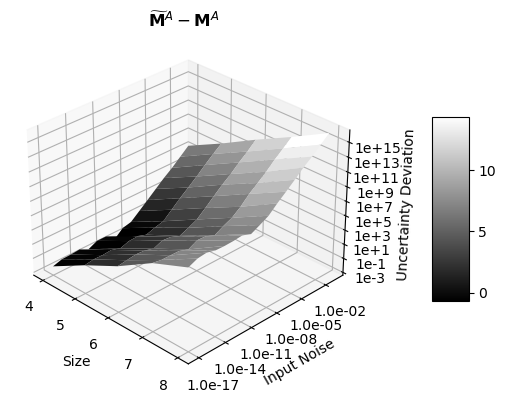

In [7]:
PlotSurface('Adjugate Uncertainty Deviation', logz=True, cmap=plt.cm.gray, view=(30, -45), 
            title=r'$\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', zlabel='Uncertainty Deviation')

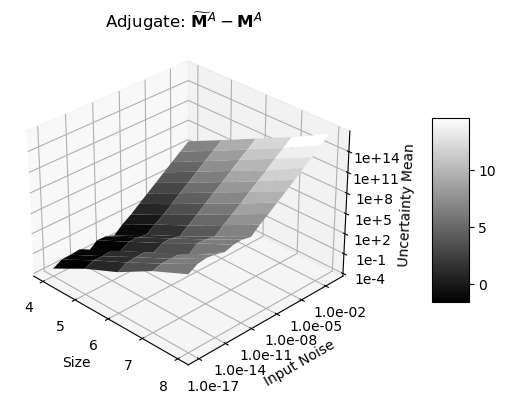

In [8]:
PlotSurface('Adjugate Uncertainty Mean', logz=True, cmap=plt.cm.gray, view=(30, -45), 
            title=r'Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', zlabel='Uncertainty Mean')

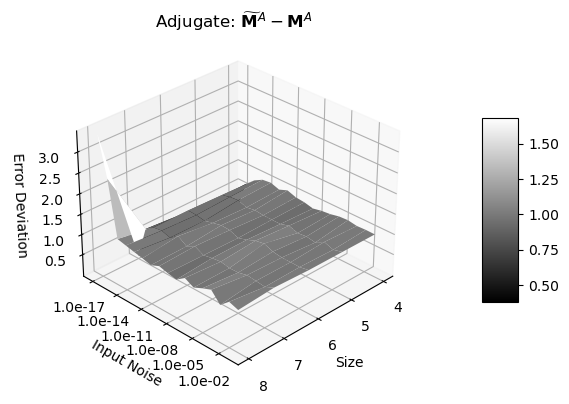

In [9]:
PlotSurface('Adjugate Error Deviation', cmap=plt.cm.gray, 
            title=r'Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', zlabel='Error Deviation')

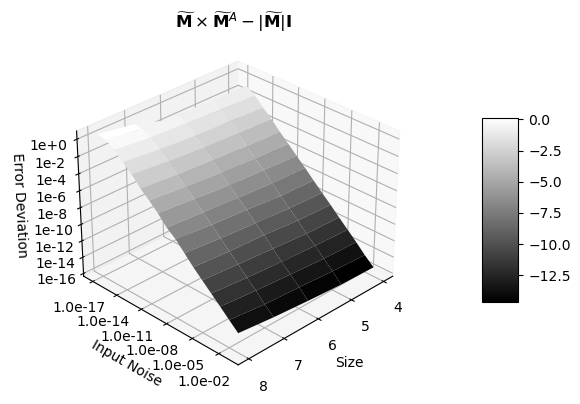

In [28]:
PlotSurface('Forward Error Deviation', cmap=plt.cm.gray, logz=True, 
            title=r'$\widetilde{\mathbf{M}} \times \widetilde{\mathbf{M}}^A - |\widetilde{\mathbf{M}}| \mathbf{I}$', 
            zlabel='Error Deviation')

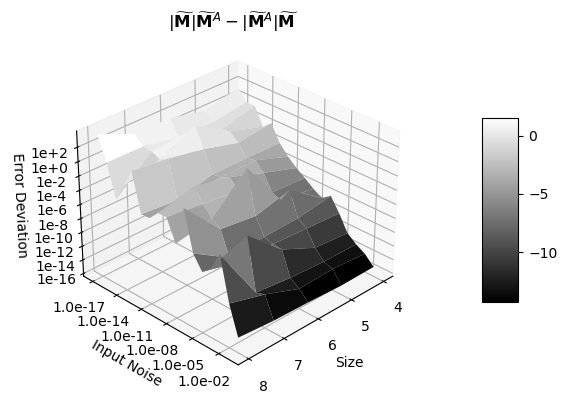

In [27]:
PlotSurface('Roundtrip Error Deviation', cmap=plt.cm.gray, logz=True, 
            title=r'$|\widetilde{\mathbf{M}}| \widetilde{\mathbf{M}}^A -|\widetilde{\mathbf{M}}^A| \widetilde{\mathbf{M}}$', 
            zlabel='Error Deviation')

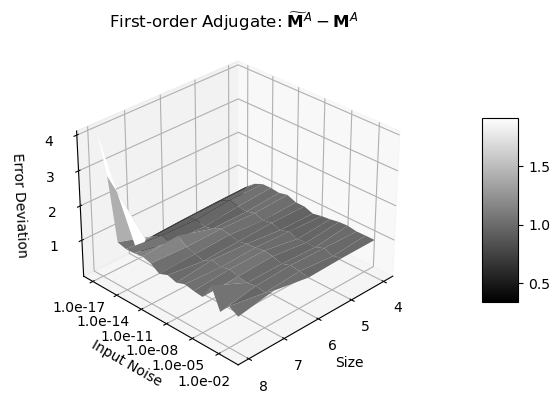

In [12]:
PlotSurface('Multiple Error Deviation', cmap=plt.cm.gray,
            title=r'First-order Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', zlabel='Error Deviation')

# Normalized Error Histogram

In [30]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.004121,0.005495,0.013736,0.020604,0.031593,...,0.031593,0.012363,0.009615,0.004121,0.004121,0.001374,0.000000,0.000000,0.000000,0.0
3,0.0,0.001362,0.000000,0.005450,0.004087,0.009537,0.009537,0.019074,0.035422,0.029973,...,0.036785,0.017711,0.017711,0.010899,0.014986,0.002725,0.001362,0.004087,0.001362,0.0
4,0.0,0.006916,0.005533,0.006916,0.005533,0.008299,0.023513,0.024896,0.020747,0.035961,...,0.031812,0.023513,0.023513,0.023513,0.008299,0.011065,0.005533,0.001383,0.000000,0.0


In [31]:
df['Label'] = df['Size'].astype(str) + ' ' + df['Noise'].astype(str)
df.columns

Index(['NoiseType', 'Noise', 'Size', 'Repeat', 'Adjugate Error Deviation',
       'Adjugate Error Mean', 'Adjugate Error Minimum',
       'Adjugate Error Maximum', 'Adjugate Error Count', 'Adjugate Error Loss',
       'Adjugate Uncertainty Deviation', 'Adjugate Uncertainty Mean',
       'Adjugate Uncertainty Minimum', 'Adjugate Uncertainty Maximum',
       'Adjugate Uncertainty Count', 'Adjugate Uncertainty Loss',
       'Forward Error Deviation', 'Forward Error Mean',
       'Forward Error Minimum', 'Forward Error Maximum', 'Forward Error Count',
       'Forward Error Loss', 'Roundtrip Error Deviation',
       'Roundtrip Error Mean', 'Roundtrip Error Minimum',
       'Roundtrip Error Maximum', 'Roundtrip Error Count',
       'Roundtrip Error Loss', 'Multiple Error Deviation',
       'Multiple Error Mean', 'Multiple Error Minimum',
       'Multiple Error Maximum', 'Multiple Error Count', 'Multiple Error Loss',
       '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8', '-1.6', '-1.4

<AxesSubplot:title={'center':'Adjugate: $\\widetilde{\\mathbf{M}}^A - \\mathbf{M}^A$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

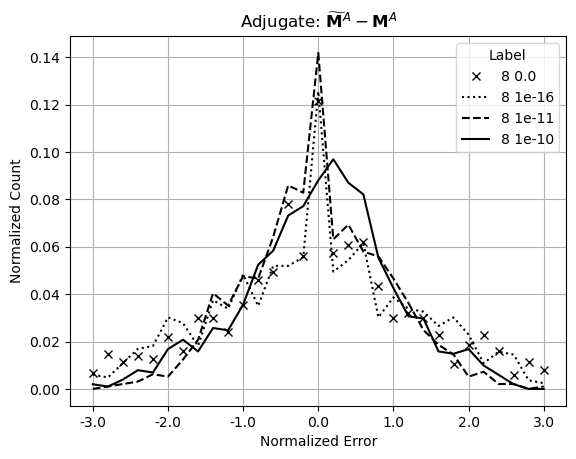

In [32]:
dfHisto = df[(df['Noise'].isin([0, 1e-16, 1e-11, 1e-10])) & (df['Size']==8)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', 
                       style=['kx','k:','k--','k-'], xlabel='Normalized Error', ylabel='Normalized Count')

<AxesSubplot:title={'center':'Adjugate: $\\widetilde{\\mathbf{M}}^A - \\mathbf{M}^A$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

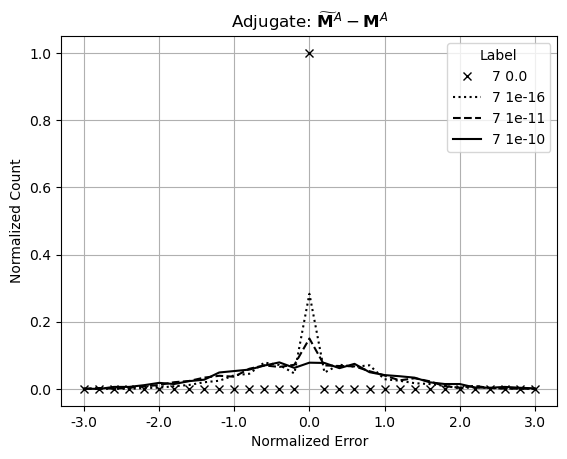

In [33]:
dfHisto = df[(df['Noise'].isin([0, 1e-16, 1e-11, 1e-10])) & (df['Size']==7)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', 
                       style=['kx','k:','k--','k-'], xlabel='Normalized Error', ylabel='Normalized Count')

<AxesSubplot:title={'center':'Adjugate Normalized Error Histogram'}>

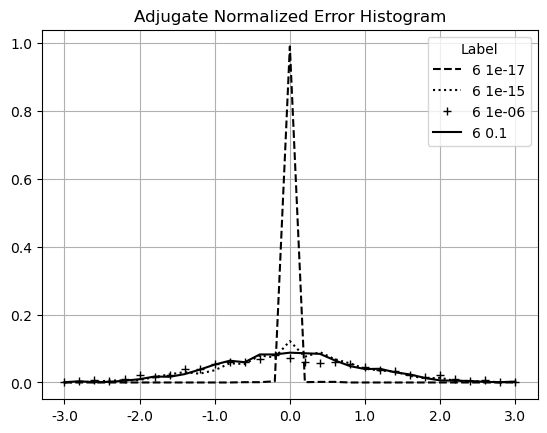

In [34]:
dfHisto = df[(df['Noise'].isin([1e-17, 1e-15, 1e-6, 1e-1])) & (df['Size']==6)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate Normalized Error Histogram', 
                       style=['k--','k:','k+','k-'])

<AxesSubplot:title={'center':'Adjugate: $\\widetilde{\\mathbf{M}}^A - \\mathbf{M}^A$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

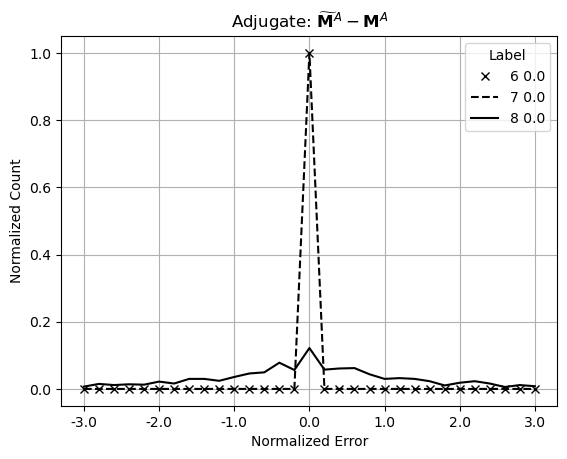

In [35]:
dfHisto = df[(df['Noise']==0) & (df['Size'] > 5)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', 
                       style=['kx','k--','k-'], xlabel='Normalized Error', ylabel='Normalized Count')

<AxesSubplot:title={'center':'Adjugate: $\\widetilde{\\mathbf{M}}^A - \\mathbf{M}^A$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

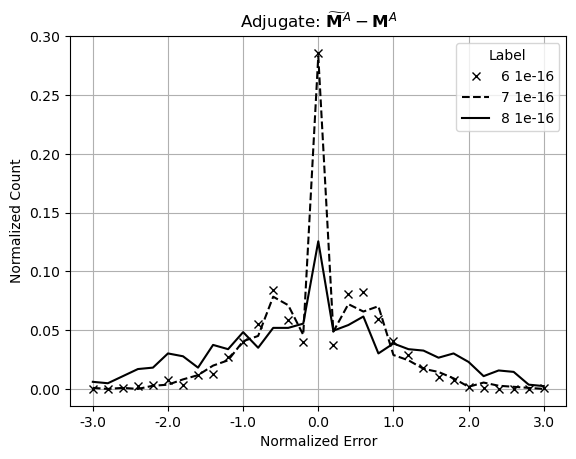

In [36]:
dfHisto = df[(df['Noise']==1e-16) & (df['Size'] > 5)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', 
                       style=['kx','k--','k-'], xlabel='Normalized Error', ylabel='Normalized Count')

<AxesSubplot:title={'center':'Adjugate: $\\widetilde{\\mathbf{M}}^A - \\mathbf{M}^A$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

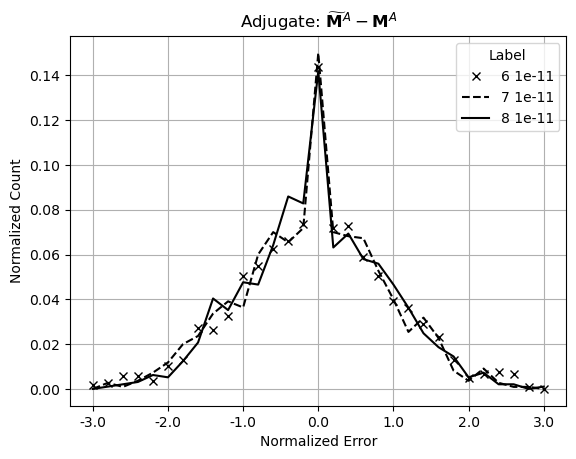

In [37]:
dfHisto = df[(df['Noise']==1e-11) & (df['Size'] > 5)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', 
                       style=['kx','k--','k-'], xlabel='Normalized Error', ylabel='Normalized Count')

<AxesSubplot:title={'center':'Adjugate: $\\widetilde{\\mathbf{M}}^A - \\mathbf{M}^A$'}, xlabel='Normalized Error', ylabel='Normalized Count'>

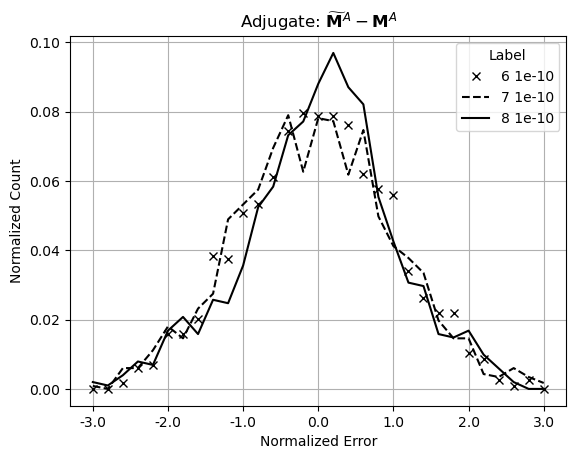

In [38]:
dfHisto = df[(df['Noise']==1e-10) & (df['Size'] > 5)].set_index('Label')
dfHisto[sHisto].T.plot(grid=True, title='Adjugate: $\widetilde{\mathbf{M}}^A - \mathbf{M}^A$', 
                       style=['kx','k--','k-'], xlabel='Normalized Error', ylabel='Normalized Count')